# SVM-SMOTE

Creates new samples by interpolation of samples of the support vectors from minority class and its closest neighbours.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

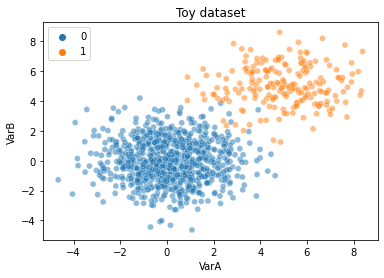

In [3]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## Find the support vectors

In [4]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Fit data
clf = clf.fit(X, y)

# support vectors, indeces
clf.support_

array([ 14,  16, 175, 363, 394, 645, 716, 729, 743, 774, 789, 805, 828,
       843, 857, 892, 896, 933, 947, 970, 991, 999])

In [5]:
# number of support vectors
len(clf.support_)

22

In [6]:
# the support vectors
clf.support_vectors_

array([[1.89067189, 3.46894026],
       [3.55280065, 1.18042471],
       [2.59903172, 1.93991186],
       [4.46078293, 0.43505015],
       [3.50809971, 1.94984446],
       [1.47265129, 2.93226302],
       [2.6635732 , 3.14077643],
       [3.91048521, 3.40917763],
       [1.55229229, 2.96022567],
       [2.30018402, 3.85145181],
       [2.74577399, 2.59163333],
       [3.53576857, 2.40996061],
       [2.93530062, 2.40009022],
       [1.5468765 , 4.46106863],
       [3.28040525, 2.01401184],
       [0.87424128, 4.0311346 ],
       [2.42426818, 2.66326821],
       [4.01080975, 2.68326504],
       [4.86643302, 1.24977632],
       [2.54595189, 2.3536446 ],
       [1.615917  , 4.09137822],
       [4.56670466, 1.36876966]])

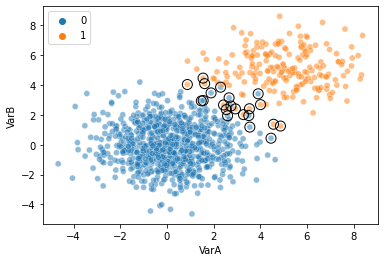

In [7]:
# mark the support vectors

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.scatter(clf.support_vectors_[:,0],
            clf.support_vectors_[:, 1],
            s=100,
            linewidth=1,
            facecolors='none',
            edgecolors='k')

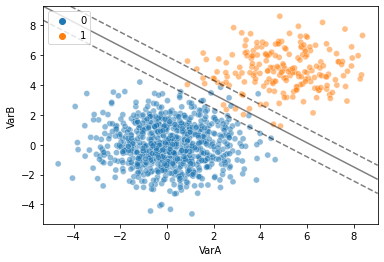

In [8]:
# plot the decision boundaries
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

## SVM SMOTE

https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SVMSMOTE.html

In [9]:
sm = SVMSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    m_neighbors=10,
    n_jobs=4,
    svm_estimator = svm.SVC(kernel='linear')
)

X_res, y_res = sm.fit_resample(X, y)

In [10]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [12]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 1    800
 0    800
 dtype: int64)

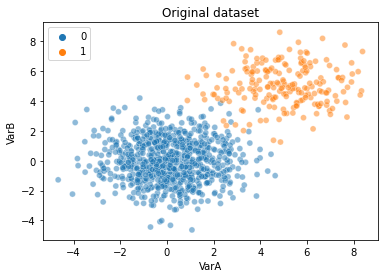

In [13]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

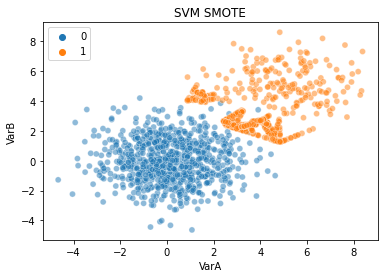

In [14]:
# plot of original data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('SVM SMOTE')
plt.show()

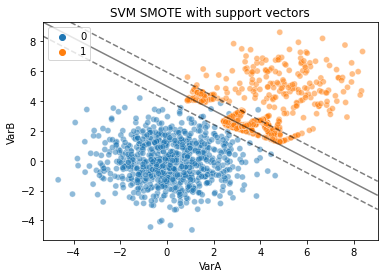

In [15]:
# plot of original data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# add decision boundaries
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# decision_function
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], clf.coef_[0]) + clf.intercept_[0]
Z = Z.reshape(xx.shape)
    
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

plt.title('SVM SMOTE with support vectors')
plt.show()

We can see that most of the synthetic examples were created closer to the support vectors from the minority class.

**HOMEWORK**

- Test SVM SMOTE using the toy datasets that we created for section 4 and see how the distribution of the newly created data varies with the different separateness of the classes. 